# Prediction of car prices

### Problem Statement
A Chinese automobile company __Geely Auto__ aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

__The company wants to know:__ <br>
Which variables are significant in predicting the price of a car.<br>
How well those variables describe the price of a car.<br>

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. <br>

 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 
Further, the model will be a good way for management to understand the pricing dynamics of a new market. 


## Reading and Understanding Data

In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [14]:
CarPrice_Assignment = pd.DataFrame(pd.read_csv("CarPrice_Assignment.csv"))

In [15]:
CarPrice_Assignment.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Inspection

In [8]:
CarPrice_Assignment.shape
# Data has 26 columns and 205 rows.

(205, 26)

In [9]:
CarPrice_Assignment.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
CarPrice_Assignment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
CarPrice_Assignment.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Data Cleaning

In [12]:
#checking duplicates
sum(CarPrice_Assignment.duplicated(subset = 'car_ID')) == 0
# No duplicate values

True

In [14]:
# Checking Null values
CarPrice_Assignment.isnull().sum()*100/CarPrice_Assignment.shape[0]
# There are no NULL values in the dataset, hence it is clean.

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

### Price : Target Variable

In [15]:
CarPrice_Assignment.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

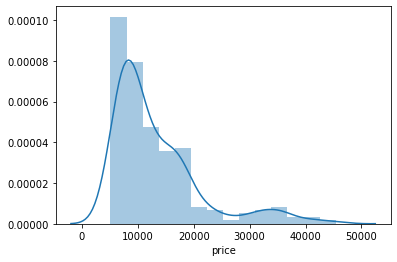

In [16]:
sns.distplot(CarPrice_Assignment['price'])

### Car ID

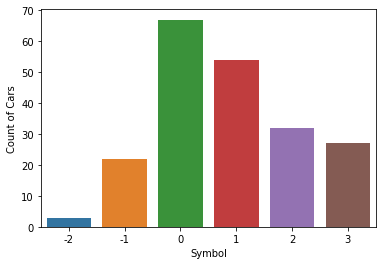

<Figure size 432x288 with 0 Axes>

In [17]:
plt1 = sns.countplot(CarPrice_Assignment['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

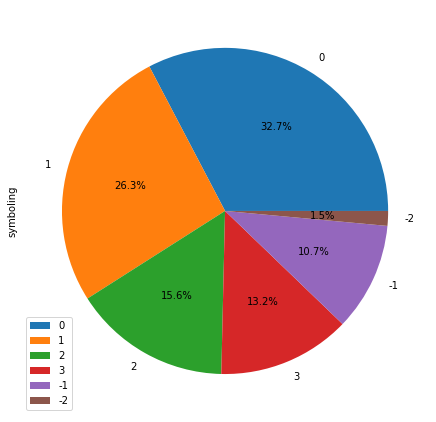

<Figure size 432x288 with 0 Axes>

In [18]:
CarPrice_Assignment_sym = pd.DataFrame(CarPrice_Assignment['symboling'].value_counts())
CarPrice_Assignment_sym.plot.pie(subplots=True,labels = CarPrice_Assignment_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

In [19]:
# Let's see average price of cars in each symbol category.

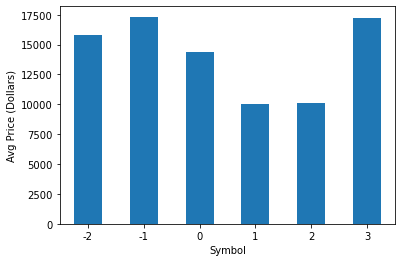

In [19]:
plt1 = CarPrice_Assignment[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()


### Car Name

In [20]:
CarPrice_Assignment.CarName.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

In [21]:
CarPrice_Assignment['brand'] = CarPrice_Assignment.CarName.str.split(' ').str.get(0).str.upper()

In [22]:
len(set(CarPrice_Assignment.brand.values))

27

In [26]:
# companies and their no of models.

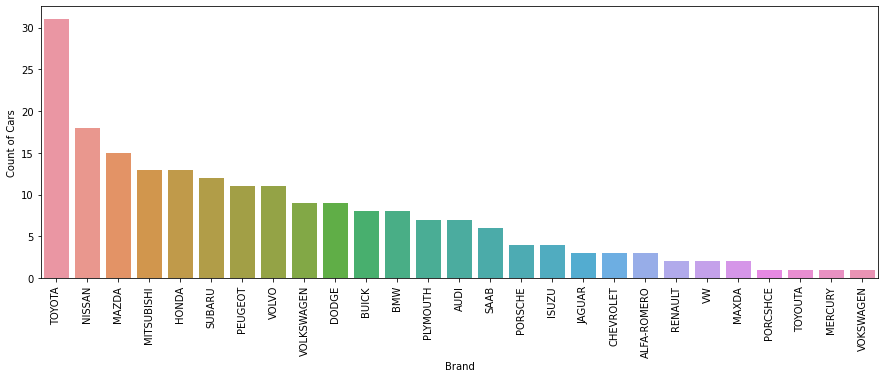

<Figure size 432x288 with 0 Axes>

In [23]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(CarPrice_Assignment['brand'], order=pd.value_counts(CarPrice_Assignment['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [24]:
CarPrice_Assignment.brand.describe()

count        205
unique        27
top       TOYOTA
freq          31
Name: brand, dtype: object

In [27]:
CarPrice_Assignment.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI


## Visualising the Data

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 1080x1080 with 0 Axes>

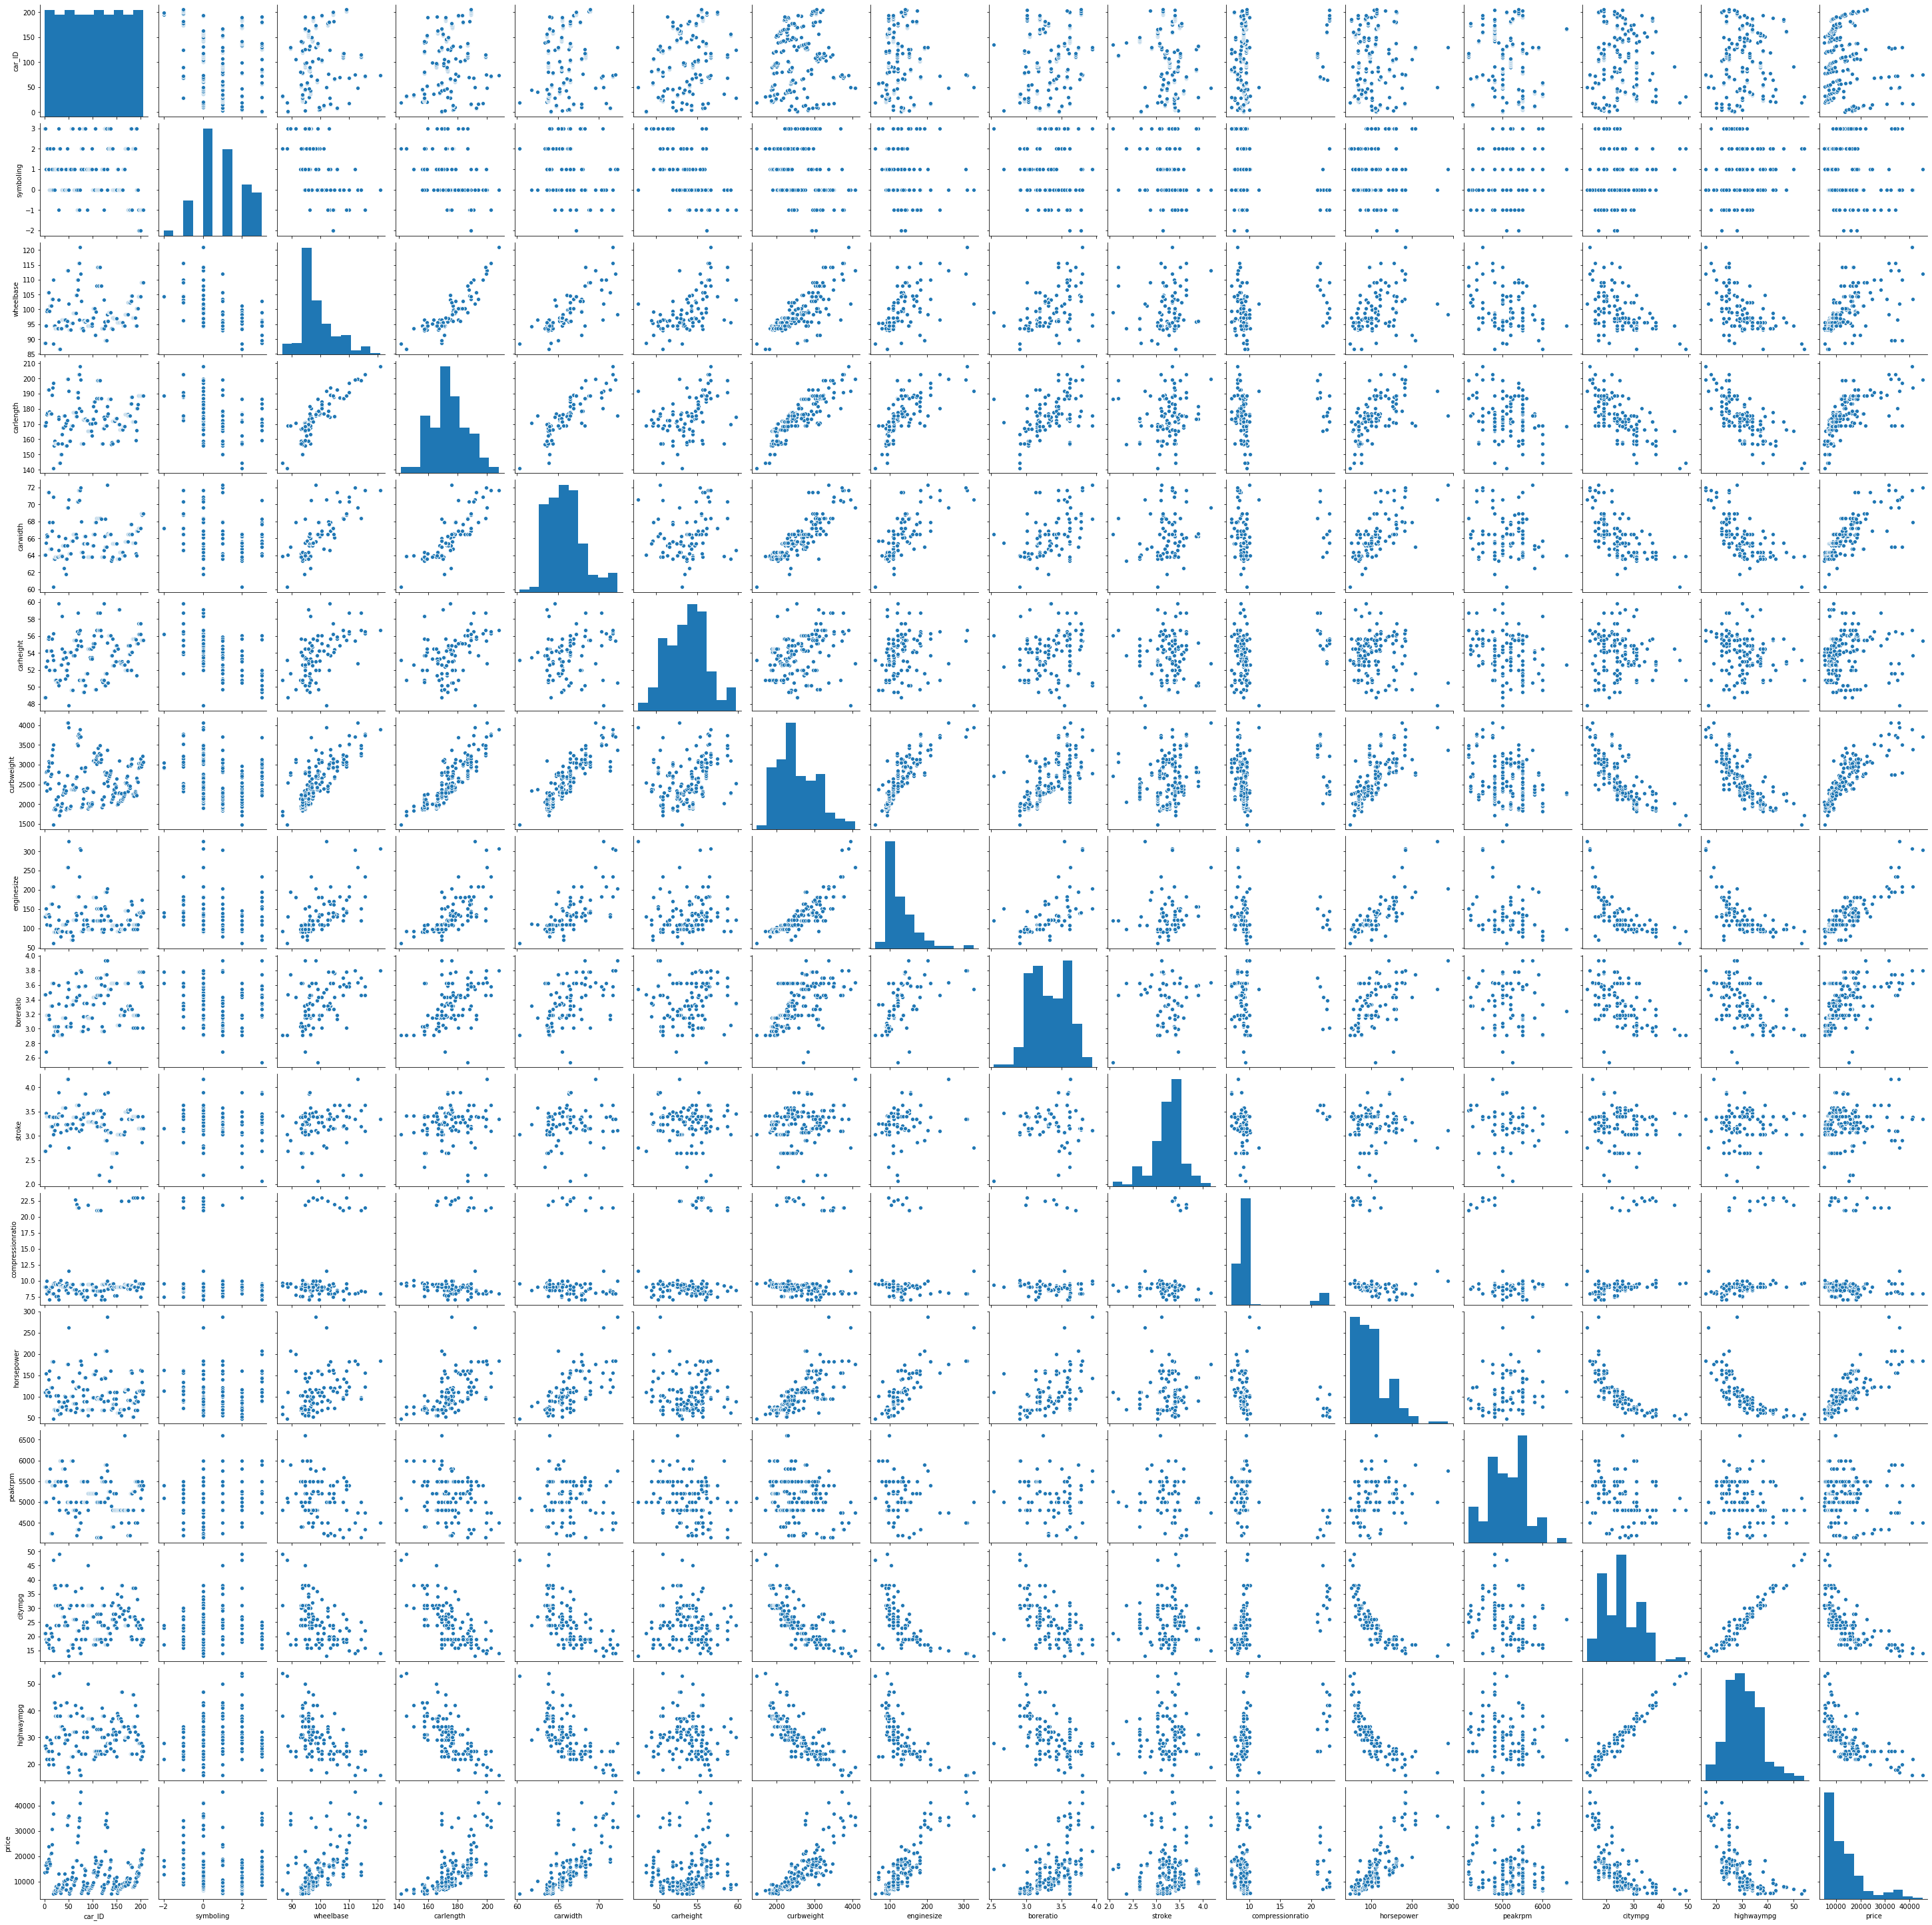

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(CarPrice_Assignment)
plt.show()

### Visualising Categorical Variables

Let's make a boxplot for categorical variables.

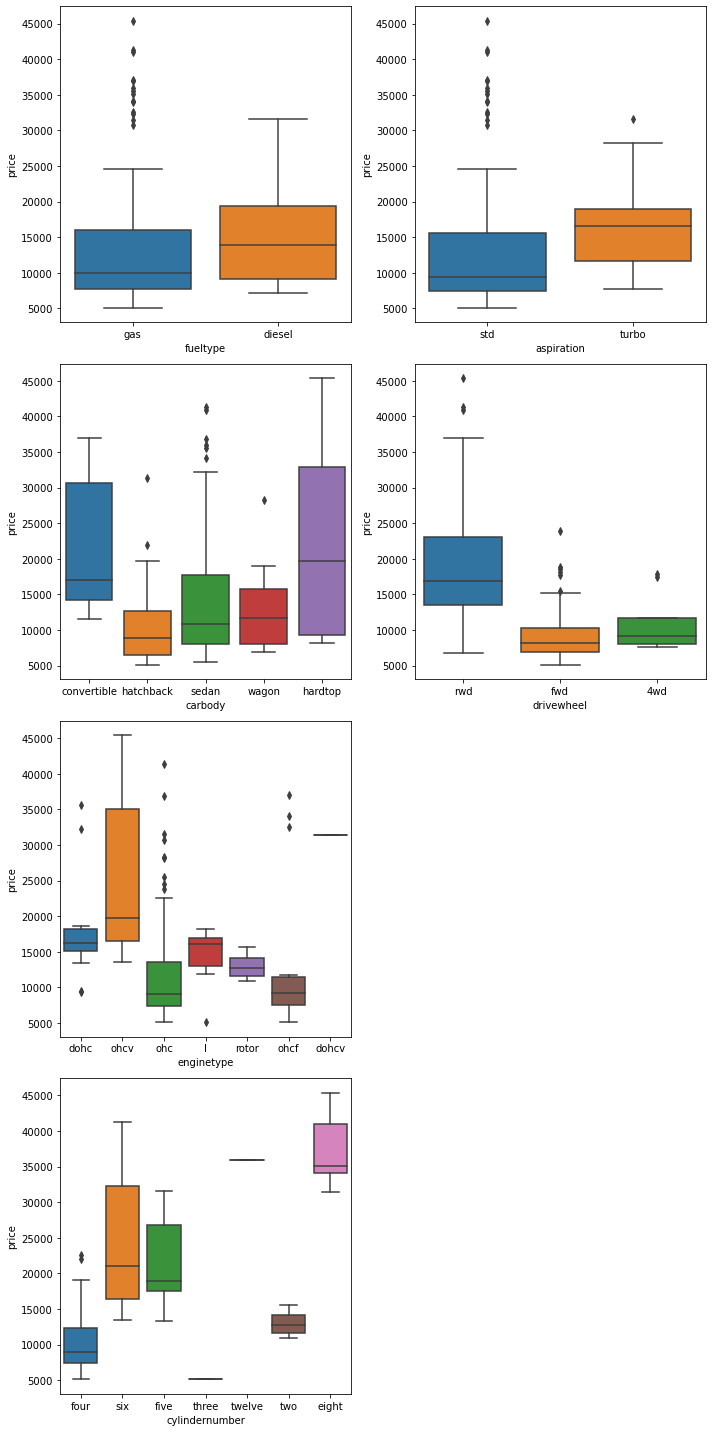

In [8]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice_Assignment)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice_Assignment)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice_Assignment)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice_Assignment)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice_Assignment)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice_Assignment)
plt.tight_layout()
plt.show()


## Data Preparation

### Dummy Variables

In [72]:
# Categorical Variables are converted into Neumerical Variables with the help of Dummy Variable 

In [9]:
cyl_no = pd.get_dummies(CarPrice_Assignment['cylindernumber'], drop_first = True)

In [14]:
CarPrice_Assignment= pd.concat([CarPrice_Assignment, cyl_no], axis = 1)

In [13]:
eng_typ = pd.get_dummies(CarPrice_Assignment['enginetype'], drop_first = True)

In [15]:
CarPrice_Assignment = pd.concat([CarPrice_Assignment, eng_typ], axis = 1)

In [16]:
drwh = pd.get_dummies(CarPrice_Assignment['drivewheel'], drop_first = True)

In [17]:
CarPrice_Assignment = pd.concat([CarPrice_Assignment, drwh], axis = 1)

In [18]:
carb = pd.get_dummies(CarPrice_Assignment['carbody'], drop_first = True)

In [19]:
CarPrice_Assignment = pd.concat([CarPrice_Assignment, carb], axis = 1)

In [20]:
asp = pd.get_dummies(CarPrice_Assignment['aspiration'], drop_first = True)

In [21]:
CarPrice_Assignment = pd.concat([CarPrice_Assignment, asp], axis = 1)

In [22]:
fuelt = pd.get_dummies(CarPrice_Assignment['fueltype'], drop_first = True)

In [23]:
CarPrice_Assignment = pd.concat([CarPrice_Assignment, fuelt], axis = 1)

In [25]:
CarPrice_Assignment.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber',], axis = 1, inplace = True)

## Model Building

## Splitting the Data into Training and Testing sets

In [16]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice_Assignment, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [28]:
# We will use min-max scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [48]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-48-c782c343e699>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
c:\users\naidu\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
CarPrice_Assignment_train.head()

,car_ID,symboling,CarName,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,123,1,plymouth fury gran sedan,four,front,0.244828,0.426016,0.291667,50.8,0.272692,...,0,0,1,0,0,0,1,0,0,1
125,126,3,porsche macan,two,front,0.272414,0.452033,0.666667,50.2,0.500388,...,0,0,0,1,0,1,0,0,0,1
166,167,1,toyota corolla tercel,two,front,0.272414,0.448780,0.308333,52.6,0.314973,...,0,0,0,1,0,1,0,0,0,1
1,2,3,alfa-romero stelvio,two,front,0.068966,0.450407,0.316667,48.8,0.411171,...,0,0,0,1,0,0,0,0,0,1
199,200,-1,volvo diesel,four,front,0.610345,0.775610,0.575000,57.5,0.647401,...,0,0,0,1,0,0,0,1,1,1


In [50]:
CarPrice_Assignment_train.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.524476,0.797203,0.411141,0.525476,0.461655,53.551748,0.407878,0.241351,0.497946,3.250070,...,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,58.977655,1.195999,0.205581,0.204848,0.184517,2.433766,0.211269,0.154619,0.207140,0.312529,...,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,1.000000,-2.000000,0.000000,0.000000,0.000000,47.800000,0.000000,0.000000,0.000000,2.190000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,0.000000,0.272414,0.399187,0.304167,51.800000,0.245539,0.135849,0.305556,3.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,97.000000,1.000000,0.341379,0.502439,0.425000,53.700000,0.355702,0.184906,0.500000,3.270000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,147.500000,1.000000,0.503448,0.669919,0.550000,55.350000,0.559542,0.301887,0.682540,3.400000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,205.000000,3.000000,1.000000,1.000000,1.000000,59.100000,1.000000,1.000000,1.000000,4.170000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


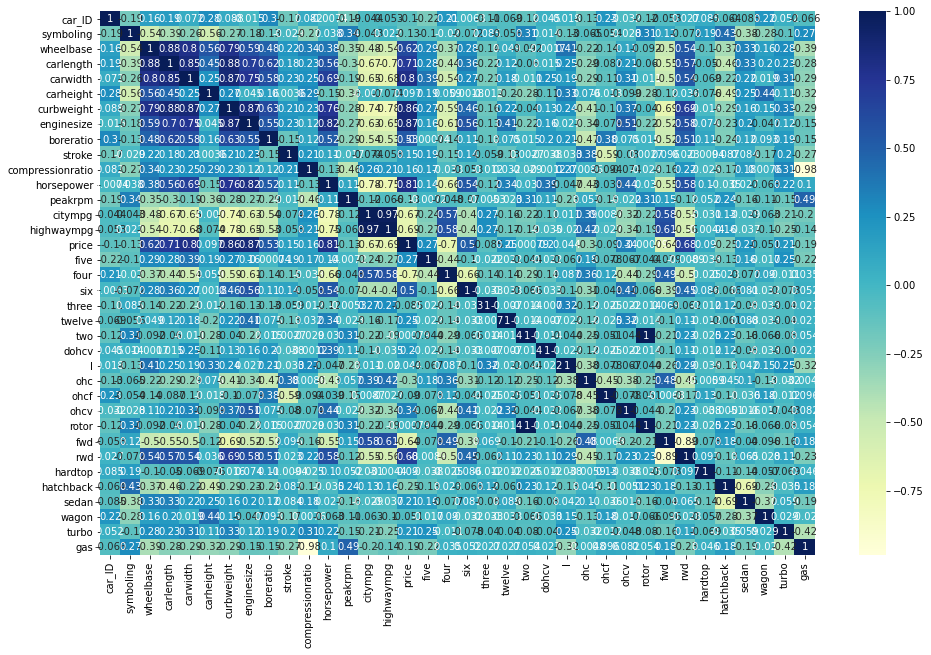

In [51]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [18]:
y_train = df_train.pop('price')
X_train = df_train

### RFE
Recursive feature elimination

In [19]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [20]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [62]:
lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

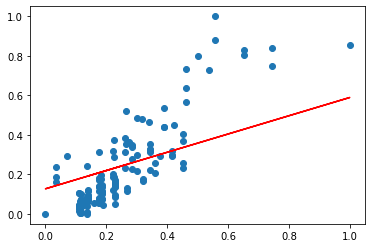

In [63]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [21]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight']]

In [22]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.128113
enginesize    0.678162
curbweight    0.450496
dtype: float64

In [23]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           5.31e-50
Time:                        14:08:49   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

In [24]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight','wheelbase']]

In [25]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.124411
enginesize    0.656489
curbweight    0.496748
wheelbase    -0.042165
dtype: float64

In [26]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     188.6
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           8.39e-49
Time:                        14:09:02   Log-Likelihood:                 133.03
No. Observations:                 143   AIC:                            -258.1
Df Residuals:                     139   BIC:                            -246.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1244      0.019     -6.644      0.0

In [27]:
X_train_lm = X_train[['enginesize', 'curbweight','wheelbase','horsepower']]

In [28]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.134848
enginesize    0.483261
curbweight    0.291307
wheelbase     0.092577
horsepower    0.354779
dtype: float64

In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     158.3
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           1.59e-50
Time:                        14:09:14   Log-Likelihood:                 139.97
No. Observations:                 143   AIC:                            -269.9
Df Residuals:                     138   BIC:                            -255.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1348      0.018     -7.442      0.0

In [30]:
X_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
122,123,1,plymouth fury gran sedan,gas,std,four,sedan,fwd,front,0.244828,...,four,0.139623,2bbl,0.230159,3.23,9.4,0.083333,5500,31,38
125,126,3,porsche macan,gas,std,two,hatchback,rwd,front,0.272414,...,four,0.339623,mpfi,1.000000,3.11,9.5,0.395833,5500,19,27
166,167,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,0.272414,...,four,0.139623,mpfi,0.444444,3.08,9.4,0.266667,6600,26,29
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,0.068966,...,four,0.260377,mpfi,0.626984,2.68,9.0,0.262500,5000,21,27
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,0.610345,...,four,0.260377,mpfi,0.746032,3.15,7.5,0.475000,5100,17,22


In [31]:
X_train.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
X_train_lm = X_train[['enginesize','horsepower']]

In [34]:
X_train_lm = sm.add_constant(X_train_lm)

lr_a = sm.OLS(y_train, X_train_lm).fit()

In [35]:
lr_a.params

const        -0.078951
enginesize    0.878745
horsepower    0.379117
dtype: float64

In [36]:
print(lr_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     250.1
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           6.17e-47
Time:                        14:09:49   Log-Likelihood:                 125.63
No. Observations:                 143   AIC:                            -245.3
Df Residuals:                     140   BIC:                            -236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.016     -4.981      0.0

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 0)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.0
1,enginesize,3.0
2,horsepower,3.0


In [39]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [40]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

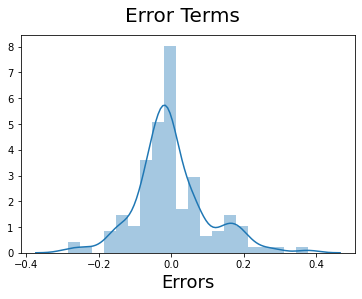

In [41]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)                  

In [46]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower',]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-46-ca5788c02f8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
c:\users\naidu\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [134]:
df_test.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,113.322581,0.919355,0.437764,0.559481,0.480376,54.124194,0.428470,0.265673,0.556580,3.267742,...,0.064516,0.0,0.564516,0.419355,0.080645,0.338710,0.451613,0.096774,0.177419,0.887097
std,59.300782,1.358620,0.212861,0.189947,0.165440,2.438670,0.179488,0.162820,0.228484,0.318261,...,0.247676,0.0,0.499868,0.497482,0.274512,0.477134,0.501716,0.298064,0.385142,0.319058
min,4.000000,-2.000000,0.000000,0.056911,0.183333,49.400000,0.128394,0.067925,-0.111111,2.070000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.313793,0.459350,0.358333,52.150000,0.305275,0.177358,0.404762,3.150000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,117.500000,1.000000,0.387931,0.547967,0.441667,54.450000,0.406129,0.226415,0.563492,3.350000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,167.500000,2.000000,0.570690,0.719919,0.516667,55.700000,0.564876,0.316038,0.746032,3.460000,...,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,202.000000,3.000000,1.182759,1.089431,0.975000,59.800000,0.935609,0.932075,0.888889,3.900000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
y_test = df_test.pop('price')
X_test = df_test

In [143]:
X_train_new = X_train_lm.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [144]:
y_pred = lm.predict(X_test_new)

In [145]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7936313826959651

Text(0, 0.5, 'y_pred')

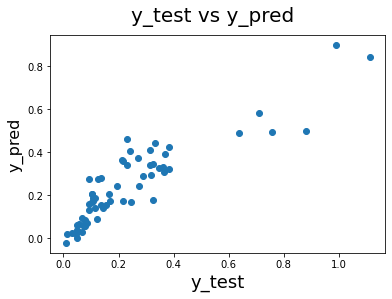

In [146]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          